In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
from sklearn.ensemble import IsolationForest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML 2/Dermatology/dermatology_database_1.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(file_path)
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [ ]:
df.isna().sum()

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


In [ ]:
# Function to count question marks in each column
def count_question_marks(column):
    return column.apply(lambda x: str(x).count('?')).sum()

# Applying the function to each column
question_marks_count = df.apply(count_question_marks)

print(question_marks_count)

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

In [ ]:
# Replace question marks with NaN in the 'age' column
df['age'] = df['age'].replace('?', np.nan).astype(float)

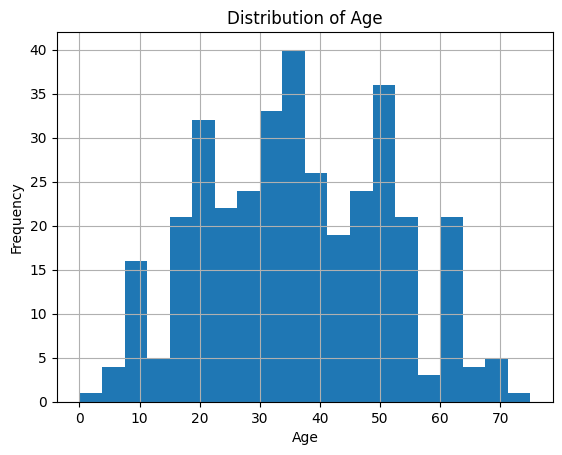

Skewness of age: 0.07335210626078169


In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'age' column
df['age'].hist(bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Check the skewness of the 'age' column
skewness = df['age'].skew()
print(f'Skewness of age: {skewness}')


Since abs(skewness) < 0.5, the data is approximately normally distributed, so use the mean to impute

In [ ]:
if abs(skewness) < 0.5:
    # Replace NaN with mean
    df['age'].fillna(df['age'].mean(), inplace=True)
else:
    # Replace NaN with median
    df['age'].fillna(df['age'].median(), inplace=True)


In [ ]:
print(df['age'].isnull().sum())
print(df['age'].head())

0
0    55.0
1     8.0
2    26.0
3    40.0
4    45.0
Name: age, dtype: float64


In [ ]:
df.isna().sum()

,0
erythema,0
scaling,0
definite_borders,0
itching,0
koebner_phenomenon,0
polygonal_papules,0
follicular_papules,0
oral_mucosal_involvement,0
knee_and_elbow_involvement,0
scalp_involvement,0


In [ ]:
df.dtypes

,0
erythema,int64
scaling,int64
definite_borders,int64
itching,int64
koebner_phenomenon,int64
polygonal_papules,int64
follicular_papules,int64
oral_mucosal_involvement,int64
knee_and_elbow_involvement,int64
scalp_involvement,int64


In [ ]:
# Convert 'class' and 'family_history' columns to categorical
df[['class', 'family_history']] = df[['class', 'family_history']].astype('category')

In [ ]:
df.dtypes

,0
erythema,int64
scaling,int64
definite_borders,int64
itching,int64
koebner_phenomenon,int64
polygonal_papules,int64
follicular_papules,int64
oral_mucosal_involvement,int64
knee_and_elbow_involvement,int64
scalp_involvement,int64


In [ ]:
df.shape

(366, 35)

In [ ]:
#Check for duplicates in the entire DataFrame
duplicate_rows = df[df.duplicated()]
num_duplicates = duplicate_rows.shape[0]

print(f"Number of duplicate rows found: {num_duplicates}")

Number of duplicate rows found: 0


In [ ]:
# Filter the DataFrame to get rows where class is 2
seborrheic_dermatitis_cases = df[df['class'] == 2]

# Find the unique values of koebner_phenomenon for these records
unique_koebner_values = seborrheic_dermatitis_cases['koebner_phenomenon'].unique()

# Display the unique koebner values
print("Unique koebner_phenomenon values for class 2 (seborrheic dermatitis):", unique_koebner_values)

Unique koebner_phenomenon values for class 2 (seborrheic dermatitis): [0 2]


In [ ]:
# Count the number of records for each unique koebner_phenomenon value in these cases
koebner_value_counts = seborrheic_dermatitis_cases['koebner_phenomenon'].value_counts()

# Display the counts
print("Counts of each koebner_phenomenon value for class 2 (seborrheic dermatitis):")
print(koebner_value_counts)

Counts of each koebner_phenomenon value for class 2 (seborrheic dermatitis):
koebner_phenomenon
0    60
2     1
Name: count, dtype: int64


Only 0 is possible as koebner_phenomenon is not a symptom of seborrheic dermatitis

In [ ]:
# Remove the record where class is 2 and koebner_phenomenon is 2
filtered_df = df[~((df['class'] == 2) & (df['koebner_phenomenon'] == 2))]

# Verify the record has been removed
print(filtered_df.shape)

(365, 35)


In [ ]:
#Features (all columns except the target column)
X = filtered_df.drop(columns=['class'])
#Target variable
y = filtered_df['class']

#Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print the shapes of the resulting datasets to verify the split
print("Training set - Features shape:", X_train.shape, " Target shape:", y_train.shape)
print("Testing set - Features shape:", X_test.shape, " Target shape:", y_test.shape)

Training set - Features shape: (292, 34)  Target shape: (292,)
Testing set - Features shape: (73, 34)  Target shape: (73,)


In [ ]:
# Verify the class distribution
import pandas as pd

print("Class distribution without using SMOTENC:")
print(y_train.value_counts())

Class distribution without using SMOTENC:
class
1    85
3    59
2    49
5    43
4    42
6    14
Name: count, dtype: int64


Scale numerical features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Identify numerical features (including ordinal)
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Separate numerical features
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

# Separate categorical features
X_train_categorical = X_train.drop(columns=numerical_features)
X_test_categorical = X_test.drop(columns=numerical_features)

# Initialize and fit the MinMaxScaler
scaler = MinMaxScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled = scaler.transform(X_test_numerical)

# Combine scaled numerical features with the unchanged categorical features
X_train_preprocessed = np.hstack([X_train_numerical_scaled, X_train_categorical.values])
X_test_preprocessed = np.hstack([X_test_numerical_scaled, X_test_categorical.values])

# Print the shapes to verify
print("X_train_preprocessed shape:", X_train_preprocessed.shape)
print("X_test_preprocessed shape:", X_test_preprocessed.shape)

X_train_preprocessed shape: (292, 34)
X_test_preprocessed shape: (73, 34)


In [ ]:
import pandas as pd

# Convert preprocessed numpy arrays back to DataFrames for easier inspection
# Assuming you have column names for the original features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.drop(columns=numerical_features).columns

# Create DataFrames for scaled numerical features
X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=numerical_features)
X_test_numerical_scaled_df = pd.DataFrame(X_test_numerical_scaled, columns=numerical_features)

# Create DataFrames for unchanged categorical features
X_train_categorical_df = pd.DataFrame(X_train_categorical.values, columns=categorical_features)
X_test_categorical_df = pd.DataFrame(X_test_categorical.values, columns=categorical_features)

# Combine scaled numerical features with categorical features
X_train_preprocessed_df = pd.concat([X_train_numerical_scaled_df, X_train_categorical_df], axis=1)
X_test_preprocessed_df = pd.concat([X_test_numerical_scaled_df, X_test_categorical_df], axis=1)

# Display the first few rows of the preprocessed data
print("First few rows of the preprocessed training data:")
print(X_train_preprocessed_df.head())

print("\nFirst few rows of the preprocessed test data:")
print(X_test_preprocessed_df.head())


First few rows of the preprocessed training data:
   erythema   scaling  definite_borders   itching  koebner_phenomenon  \
0  0.666667  0.666667          0.666667  1.000000            0.333333   
1  0.333333  0.333333          0.000000  0.666667            0.000000   
2  0.333333  0.333333          0.000000  0.333333            0.000000   
3  1.000000  0.666667          0.333333  0.666667            0.000000   
4  0.333333  0.333333          0.666667  1.000000            0.000000   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0           0.666667            0.000000                  0.666667   
1           0.000000            0.000000                  0.000000   
2           0.000000            0.666667                  0.000000   
3           0.000000            0.000000                  0.000000   
4           0.000000            0.000000                  0.000000   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                         0.0    

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Example: Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_preprocessed, y_train)

# Predict on the training set
y_pred_train = log_reg.predict(X_train_preprocessed)
# Predict on the test set
y_pred_test = log_reg.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Logistic Regression Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))

# Evaluate the model on the test set
print("\nLogistic Regression Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))


Logistic Regression Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       0.96      0.96      0.96        49
           3       1.00      1.00      1.00        59
           4       0.95      0.95      0.95        42
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        14

    accuracy                           0.99       292
   macro avg       0.99      0.99      0.99       292
weighted avg       0.99      0.99      0.99       292

Accuracy: 0.9863013698630136

Logistic Regression Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        13
           4       1.00      0.86      0.92         7
           5    

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the model on the resampled training data
rf_clf.fit(X_train_preprocessed, y_train)

# Predict on the training set
y_pred_train_rf = rf_clf.predict(X_train_preprocessed)
# Predict on the test set
y_pred_test_rf = rf_clf.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Random Forest Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train, y_pred_train_rf))
print("Accuracy:", accuracy_score(y_train, y_pred_train_rf))

# Evaluate the model on the test set
print("\nRandom Forest Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_test_rf))


Random Forest Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        14

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

Accuracy: 1.0

Random Forest Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize Support Vector Classifier
svm_clf = SVC(random_state=42)

# Fit the model on the resampled training data
svm_clf.fit(X_train_preprocessed, y_train)

# Predict on the training set
y_pred_train_svm = svm_clf.predict(X_train_preprocessed)
# Predict on the test set
y_pred_test_svm = svm_clf.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Support Vector Machine Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train, y_pred_train_svm))
print("Accuracy:", accuracy_score(y_train, y_pred_train_svm))

# Evaluate the model on the test set
print("\nSupport Vector Machine Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_test_svm))


Support Vector Machine Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       0.98      0.96      0.97        49
           3       1.00      1.00      1.00        59
           4       0.95      0.98      0.96        42
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        14

    accuracy                           0.99       292
   macro avg       0.99      0.99      0.99       292
weighted avg       0.99      0.99      0.99       292

Accuracy: 0.9897260273972602

Support Vector Machine Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        13
           4       1.00      0.86      0.92         7
          

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on the resampled training data
gb_clf.fit(X_train_preprocessed, y_train)

# Predict on the training set
y_pred_train_gb = gb_clf.predict(X_train_preprocessed)
# Predict on the test set
y_pred_test_gb = gb_clf.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Gradient Boosting Performance on Training Set:")
print("Classification Report:")
print(classification_report(y_train, y_pred_train_gb))
print("Accuracy:", accuracy_score(y_train, y_pred_train_gb))

# Evaluate the model on the test set
print("\nGradient Boosting Performance on Test Set:")
print("Classification Report:")
print(classification_report(y_test, y_pred_test_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_test_gb))



Gradient Boosting Performance on Training Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        59
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        14

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

Accuracy: 1.0

Gradient Boosting Performance on Test Set:
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         7
           5       1.00      1.00  

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize KNeighborsClassifier
knn_clf = KNeighborsClassifier()

# Fit the model on the resampled training data
knn_clf.fit(X_train_preprocessed, y_train)

# Predict on both the training and test sets
y_train_pred_knn = knn_clf.predict(X_train_preprocessed)
y_test_pred_knn = knn_clf.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("K-Nearest Neighbors Performance on Training Set:")
print(classification_report(y_train, y_train_pred_knn))
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred_knn))

# Evaluate the model on the test set
print("\nK-Nearest Neighbors Performance on Test Set:")
print(classification_report(y_test, y_test_pred_knn))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_knn))

K-Nearest Neighbors Performance on Training Set:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99        85
           2       0.95      0.86      0.90        49
           3       1.00      1.00      1.00        59
           4       0.85      0.98      0.91        42
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        14

    accuracy                           0.97       292
   macro avg       0.97      0.97      0.97       292
weighted avg       0.97      0.97      0.97       292

Training Set Accuracy: 0.9691780821917808

K-Nearest Neighbors Performance on Test Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00      

Logistic Ridge

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression with Ridge (L2) regularization
log_reg_ridge = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)

# Fit the model on the resampled training data
log_reg_ridge.fit(X_train_preprocessed, y_train)

# Predict on both the training and test sets
y_train_pred_log_reg_ridge = log_reg_ridge.predict(X_train_preprocessed)
y_test_pred_log_reg_ridge = log_reg_ridge.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Logistic Regression Ridge Performance on Training Set:")
print(classification_report(y_train, y_train_pred_log_reg_ridge))
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred_log_reg_ridge))

# Evaluate the model on the test set
print("\nLogistic Regression Ridge Performance on Test Set:")
print(classification_report(y_test, y_test_pred_log_reg_ridge))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_log_reg_ridge))


Logistic Regression Ridge Performance on Training Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       0.96      0.96      0.96        49
           3       1.00      1.00      1.00        59
           4       0.95      0.95      0.95        42
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        14

    accuracy                           0.99       292
   macro avg       0.99      0.99      0.99       292
weighted avg       0.99      0.99      0.99       292

Training Set Accuracy: 0.9863013698630136

Logistic Regression Ridge Performance on Test Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        13
           4       1.00      0.86      0.92         7
           5       1.00      1.00    

Logistic Lasso

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression with Lasso (L1) regularization
log_reg_lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000)

# Fit the model on the resampled training data
log_reg_lasso.fit(X_train_preprocessed, y_train)

# Predict on both the training and test sets
y_train_pred_log_reg_lasso = log_reg_lasso.predict(X_train_preprocessed)
y_test_pred_log_reg_lasso = log_reg_lasso.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Logistic Regression Lasso Performance on Training Set:")
print(classification_report(y_train, y_train_pred_log_reg_lasso))
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred_log_reg_lasso))

# Evaluate the model on the test set
print("\nLogistic Regression Lasso Performance on Test Set:")
print(classification_report(y_test, y_test_pred_log_reg_lasso))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_log_reg_lasso))

Logistic Regression Lasso Performance on Training Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       0.92      0.98      0.95        49
           3       1.00      1.00      1.00        59
           4       0.97      0.90      0.94        42
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        14

    accuracy                           0.98       292
   macro avg       0.98      0.98      0.98       292
weighted avg       0.98      0.98      0.98       292

Training Set Accuracy: 0.9828767123287672

Logistic Regression Lasso Performance on Test Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00        13
           4       1.00      0.86      0.92         7
           5       1.00      1.00    

Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the model on the resampled training data
mnb.fit(X_train_preprocessed, y_train)

# Predict on both the training and test sets
y_train_pred_mnb = mnb.predict(X_train_preprocessed)
y_test_pred_mnb = mnb.predict(X_test_preprocessed)

# Evaluate the model on the training set
print("Multinomial Naive Bayes Performance on Training Set:")
print(classification_report(y_train, y_train_pred_mnb))
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred_mnb))

# Evaluate the model on the test set
print("\nMultinomial Naive Bayes Performance on Test Set:")
print(classification_report(y_test, y_test_pred_mnb))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred_mnb))

Multinomial Naive Bayes Performance on Training Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        85
           2       0.94      0.96      0.95        49
           3       1.00      1.00      1.00        59
           4       0.95      0.93      0.94        42
           5       1.00      1.00      1.00        43
           6       1.00      1.00      1.00        14

    accuracy                           0.98       292
   macro avg       0.98      0.98      0.98       292
weighted avg       0.98      0.98      0.98       292

Training Set Accuracy: 0.9828767123287672

Multinomial Naive Bayes Performance on Test Set:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       0.91      0.91      0.91        11
           3       1.00      1.00      1.00        13
           4       0.86      0.86      0.86         7
           5       1.00      1.00      1.